# <ins> COVID 19 Twitter Data Analysis </ims>

### Problem Statement

To build a Twitter trend analyzer that will analyze a set of tweets using NLP and text-processing techniques. The trend analyzer will work on a given set of tweets, seeded on COVID19 / CORONA:

**_PRIMARY TASKS :_**

1) A tag cloud depicting what topics / Word was being talked about on Twitter .

2) Which hashtag trended (Hashtags are words or phrases beginning with # eg #COVID) .

3) Which Twitter Handler dominated the conversation on Twitter .



**_ADDITIONAL TASKS PERFORMED :_**

4) Exploring which tweet is most retweeted.

5) Analysing how the number of tweets changes as months are passed.

6) Exploring weekday based trend of tweets.

7) <ins>_SENTIMENT ANALYSIS_ </ins>: Performing sentiment analysis after text cleaning using <ins>VADER Sentiment Analysis</ins>.
  
8) Analyzing how the sentiment of tweets changed as months passed .

9) Analyzing how the sentiment of tweets changed with week days .

10) Visualzing positive and negative tweets by separate wordclouds for each category respectively .

### Importing required libraries

In [20]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from PIL import Image
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS ,ImageColorGenerator

### Importing the tweets 

In [21]:
df = pd.read_csv('Tweeter_Data_IN.csv')

In [22]:
df.head()

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44179 entries, 0 to 44178
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   created_at             44179 non-null  object
 1   hashtags               17907 non-null  object
 2   favorite_count         44179 non-null  int64 
 3   id                     44179 non-null  int64 
 4   lang                   44179 non-null  object
 5   place                  44162 non-null  object
 6   retweet_count          44179 non-null  int64 
 7   text                   44179 non-null  object
 8   tweet_url              44179 non-null  object
 9   user_screen_name       44179 non-null  object
 10  user_description       37905 non-null  object
 11  user_favourites_count  44179 non-null  int64 
 12  user_followers_count   44179 non-null  int64 
 13  user_friends_count     44179 non-null  int64 
 14  user_listed_count      44179 non-null  int64 
 15  user_location      

### Creating allwords 
 _basically a text file which contains all the tweets that are there._

In [23]:
allWords = ' '.join([twts for twts in df['text']])

### Filtering allwords 

The text **allwords** contains some useless characters like á,Æ,ü,è,ô,Ä etc. so first characters like these have to be removed and a filtered text file has to be created to construct a meaningful wordcloud._**(**These characters have ascii value greater than 126 so by applying the simple condition below we can remove these characters.**)**_

In [24]:
filtered_allwords=''

for charr in allWords :
    if ord(charr)<126 :
        filtered_allwords = filtered_allwords + charr

### 1. Creating wordcloud from filtered_allwords 

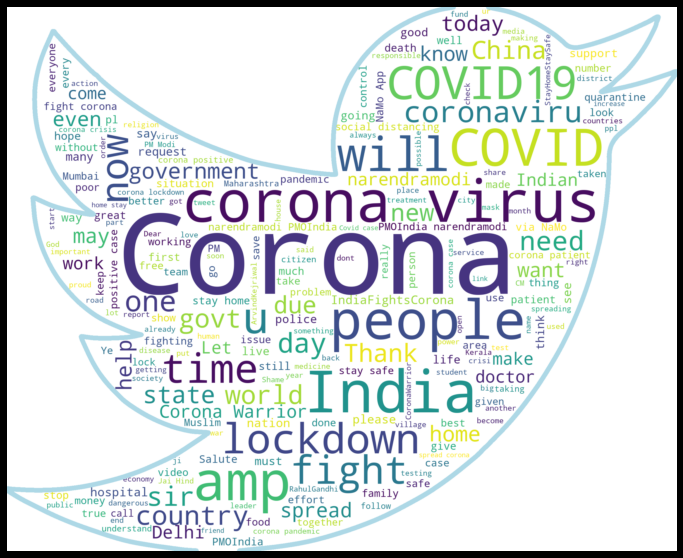

In [93]:
mask = np.array(Image.open('C:\\Users\\user\\Desktop\\image1.png'))
Stopwords = set(STOPWORDS)
Stopwords.update(['https', 'co','t','d','n','viru'])

wc = WordCloud(background_color='white',stopwords=Stopwords,mask=mask,
               contour_width=30,contour_color='lightblue',max_font_size=400,max_words=225)
wc.generate(filtered_allwords)


plt.figure(figsize=(14,10),facecolor='k')
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show();

-------
### 2. Showing popular hashtags which trended
-------

**2.a)_using regular expression to extract all hashtags_**

In [26]:
df.text.str.extractall(r'(#\w+)')[0].value_counts()

#Corona                      2736
#COVID                       1921
#COVID19                     1797
#corona                      1715
#coronavirus                 1452
                             ... 
#MORONS                         1
#askTedrosAdhanI                1
#WhatToDoDuringQuarantine       1
#PoliceSquad                    1
#TechTrends                     1
Name: 0, Length: 15092, dtype: int64

**2.b)_creating hashtag_df dataframe containing all hashtags and their count_**

In [27]:
hashtag_df = pd.DataFrame(df.text.str.extractall(r'(#\w+)')[0].value_counts())

In [28]:
hashtag_df.reset_index(inplace=True)

In [29]:
hashtag_df.columns=['Hashtag','Frequency']

In [30]:
hashtag_df.head(20)

,Hashtag,Frequency
0,#Corona,2736
1,#COVID,1921
2,#COVID19,1797
3,#corona,1715
4,#coronavirus,1452
5,#IndiaFightsCorona,1128
6,#lockdown,996
7,#Covid_19,545
8,#StayHomeStaySafe,484
9,#covid19,476


**2.c)Removing '#' symbols from text for better readability**

_custom method to remove '#' symbol from the hashtags_

In [31]:
def remove(word) :
    return word[1:]

In [32]:
hashtag_df['Hashtag'] = hashtag_df['Hashtag'].apply(remove)

In [100]:
hashtag_df.head(20)

,Hashtag,Frequency
0,Corona,2736
1,COVID,1921
2,COVID19,1797
3,corona,1715
4,coronavirus,1452
5,IndiaFightsCorona,1128
6,lockdown,996
7,Covid_19,545
8,StayHomeStaySafe,484
9,covid19,476


**_2.d)Creating plots for better visualization of tweets which trended_**

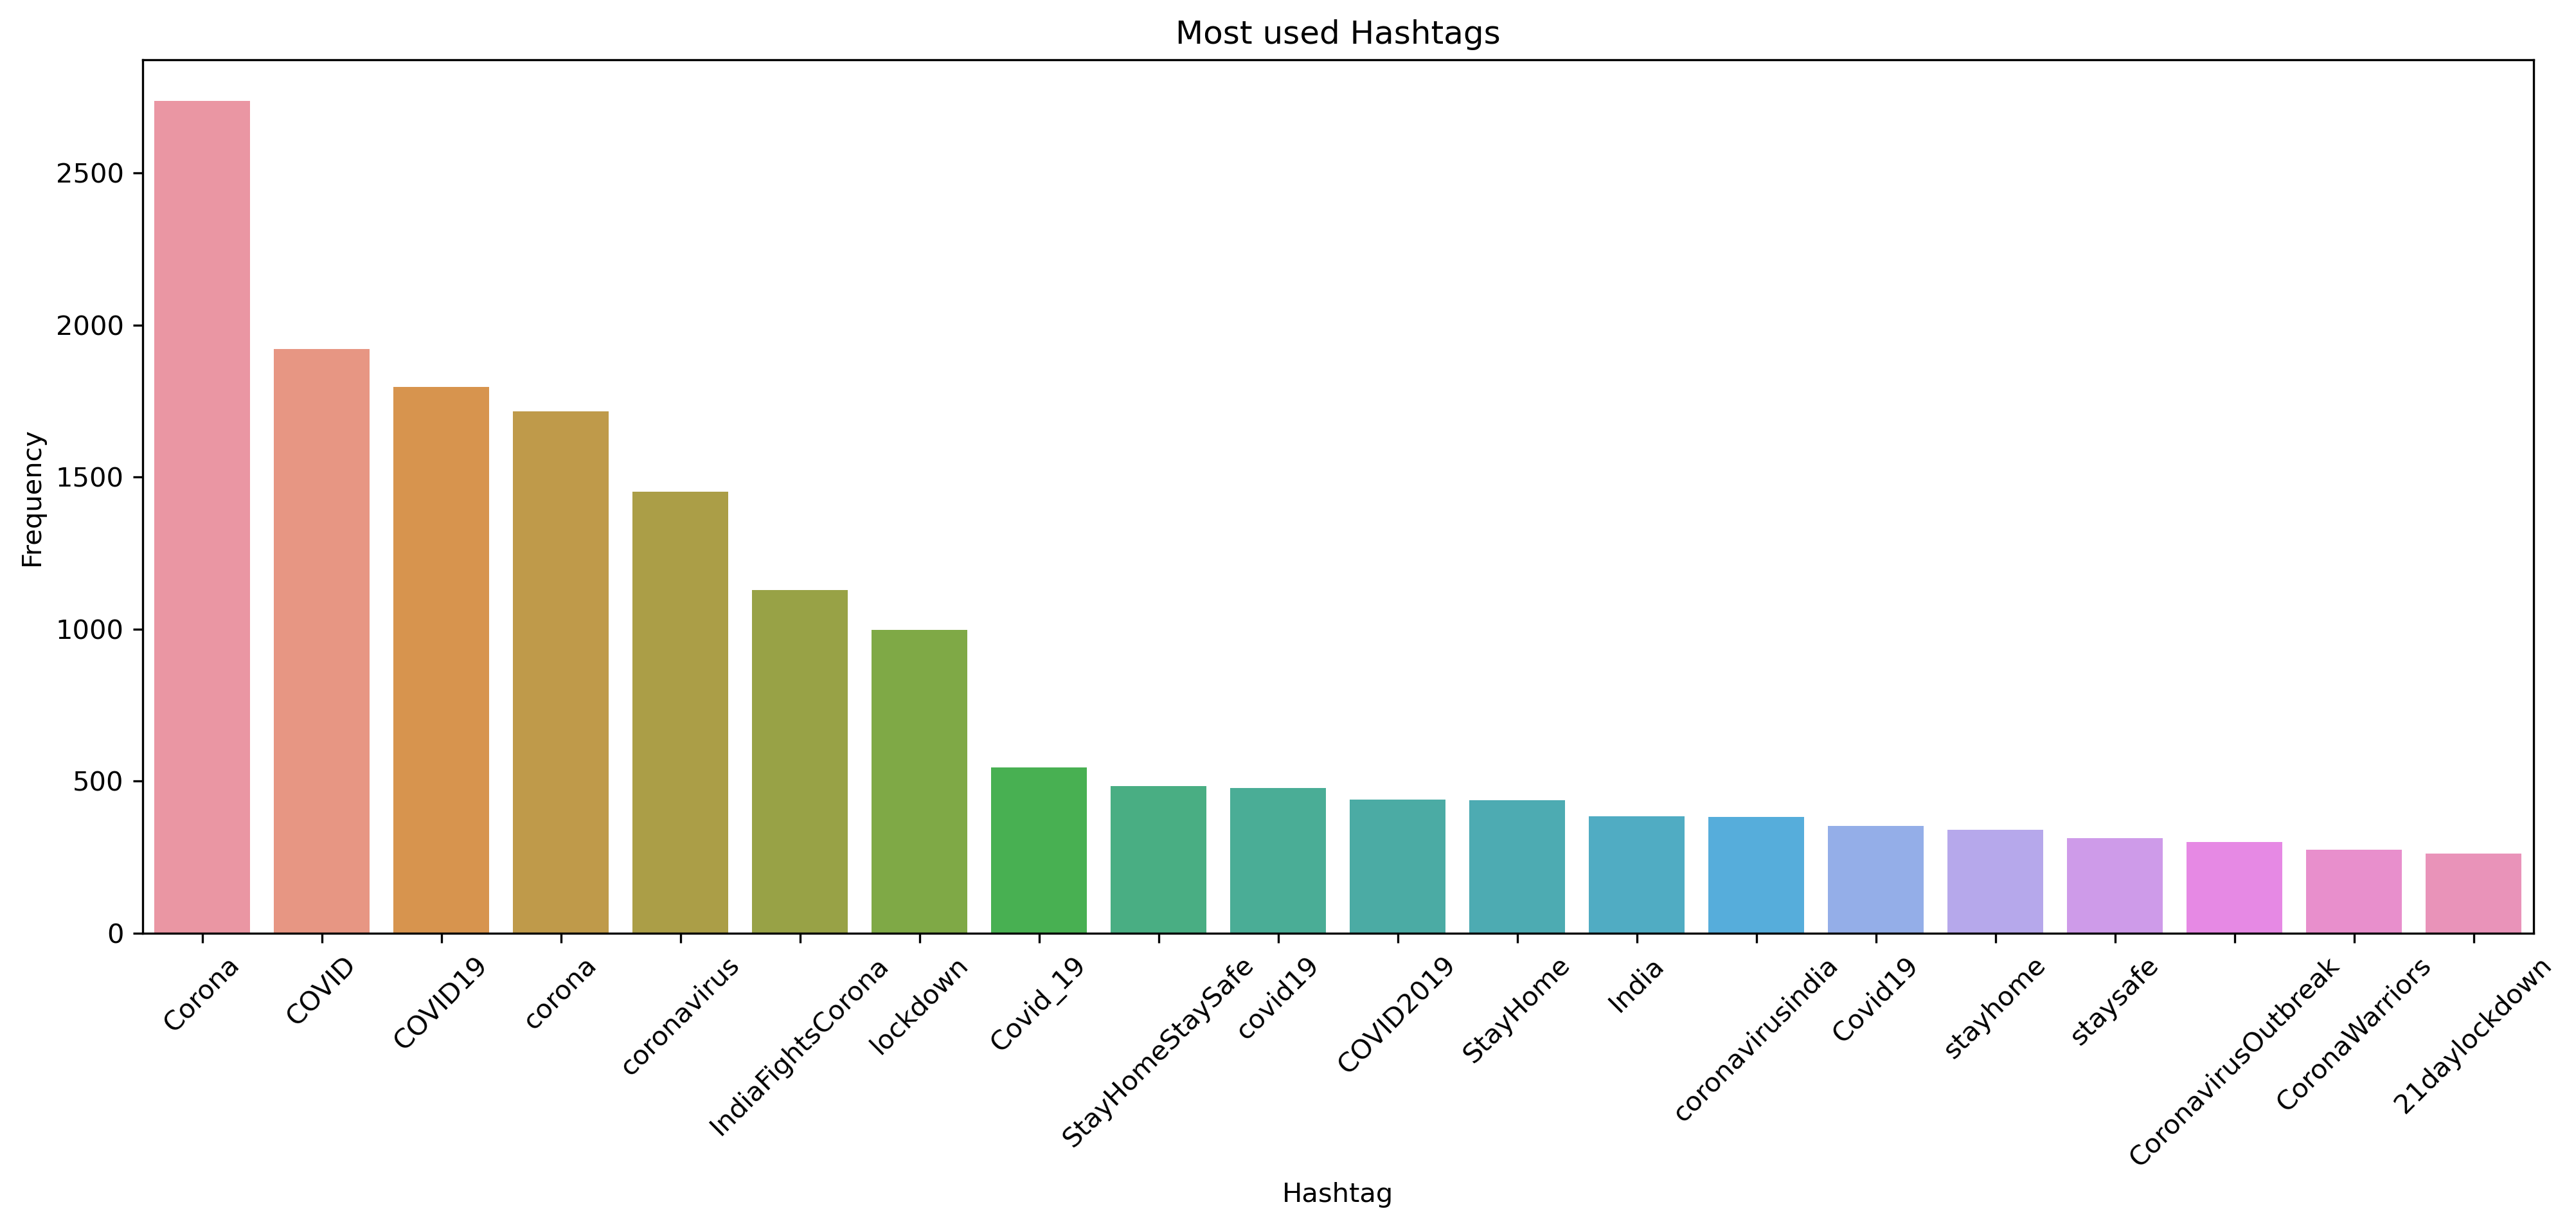

In [34]:
plt.figure(figsize=(16,6),dpi=300)

sns.barplot(x=hashtag_df['Hashtag'].head(20),y=hashtag_df['Frequency'].head(20))
plt.xticks(rotation=(45))
plt.title('Most used Hashtags');

**_2.e)Creating a pie chart to show percent wise distribution of the popular tweets_**

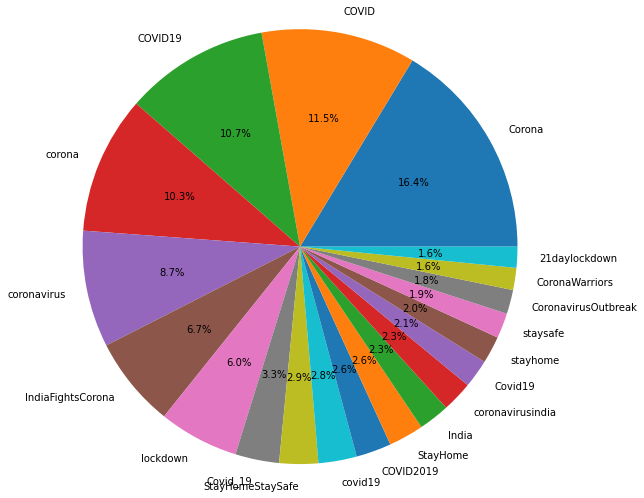

In [35]:
hashtag_df.set_index('Hashtag').head(20).plot.pie(y='Frequency',radius=2.5,autopct="%.1f%%",legend=None)
plt.ylabel("");

-------

### 3.Showing popular users
-------

**_3.a) Extracting all text with '@' symbol in beginning._**

In [40]:
df.text.str.extractall(r'(\@\w+)')[0].value_counts()

@narendramodi       3778
@PMOIndia           2779
@ArvindKejriwal      746
@AmitShah            742
@MoHFW_INDIA         541
                    ... 
@jijithb               1
@secl_cil              1
@sujnsen               1
@ChinaSpox_India       1
@gaurAnkitta           1
Name: 0, Length: 15453, dtype: int64

**3.b)_creating users_df dataframe containing all @ and their count_**

In [41]:
users_df = pd.DataFrame(df.text.str.extractall(r'(\@\w+)')[0].value_counts())

In [42]:
users_df.reset_index(inplace=True)

In [43]:
users_df.columns=['Twitter handles','Tweets']

In [44]:
users_df.head(20)

,Twitter handles,Tweets
0,@narendramodi,3778
1,@PMOIndia,2779
2,@ArvindKejriwal,746
3,@AmitShah,742
4,@MoHFW_INDIA,541
5,@myogiadityanath,521
6,@CMOMaharashtra,496
7,@RahulGandhi,482
8,@aajtak,429
9,@BJP4India,355


-----
**_3.c)Removing '@' symbols from text for better readability_**

In [45]:
def remove(word) :
    return word[1:]

In [46]:
users_df['Twitter handles']=users_df['Twitter handles'].apply(remove)

In [47]:
users_df.head(20)

,Twitter handles,Tweets
0,narendramodi,3778
1,PMOIndia,2779
2,ArvindKejriwal,746
3,AmitShah,742
4,MoHFW_INDIA,541
5,myogiadityanath,521
6,CMOMaharashtra,496
7,RahulGandhi,482
8,aajtak,429
9,BJP4India,355


**_3.d)Creating plots for better visualization of users which dominated the platform_**

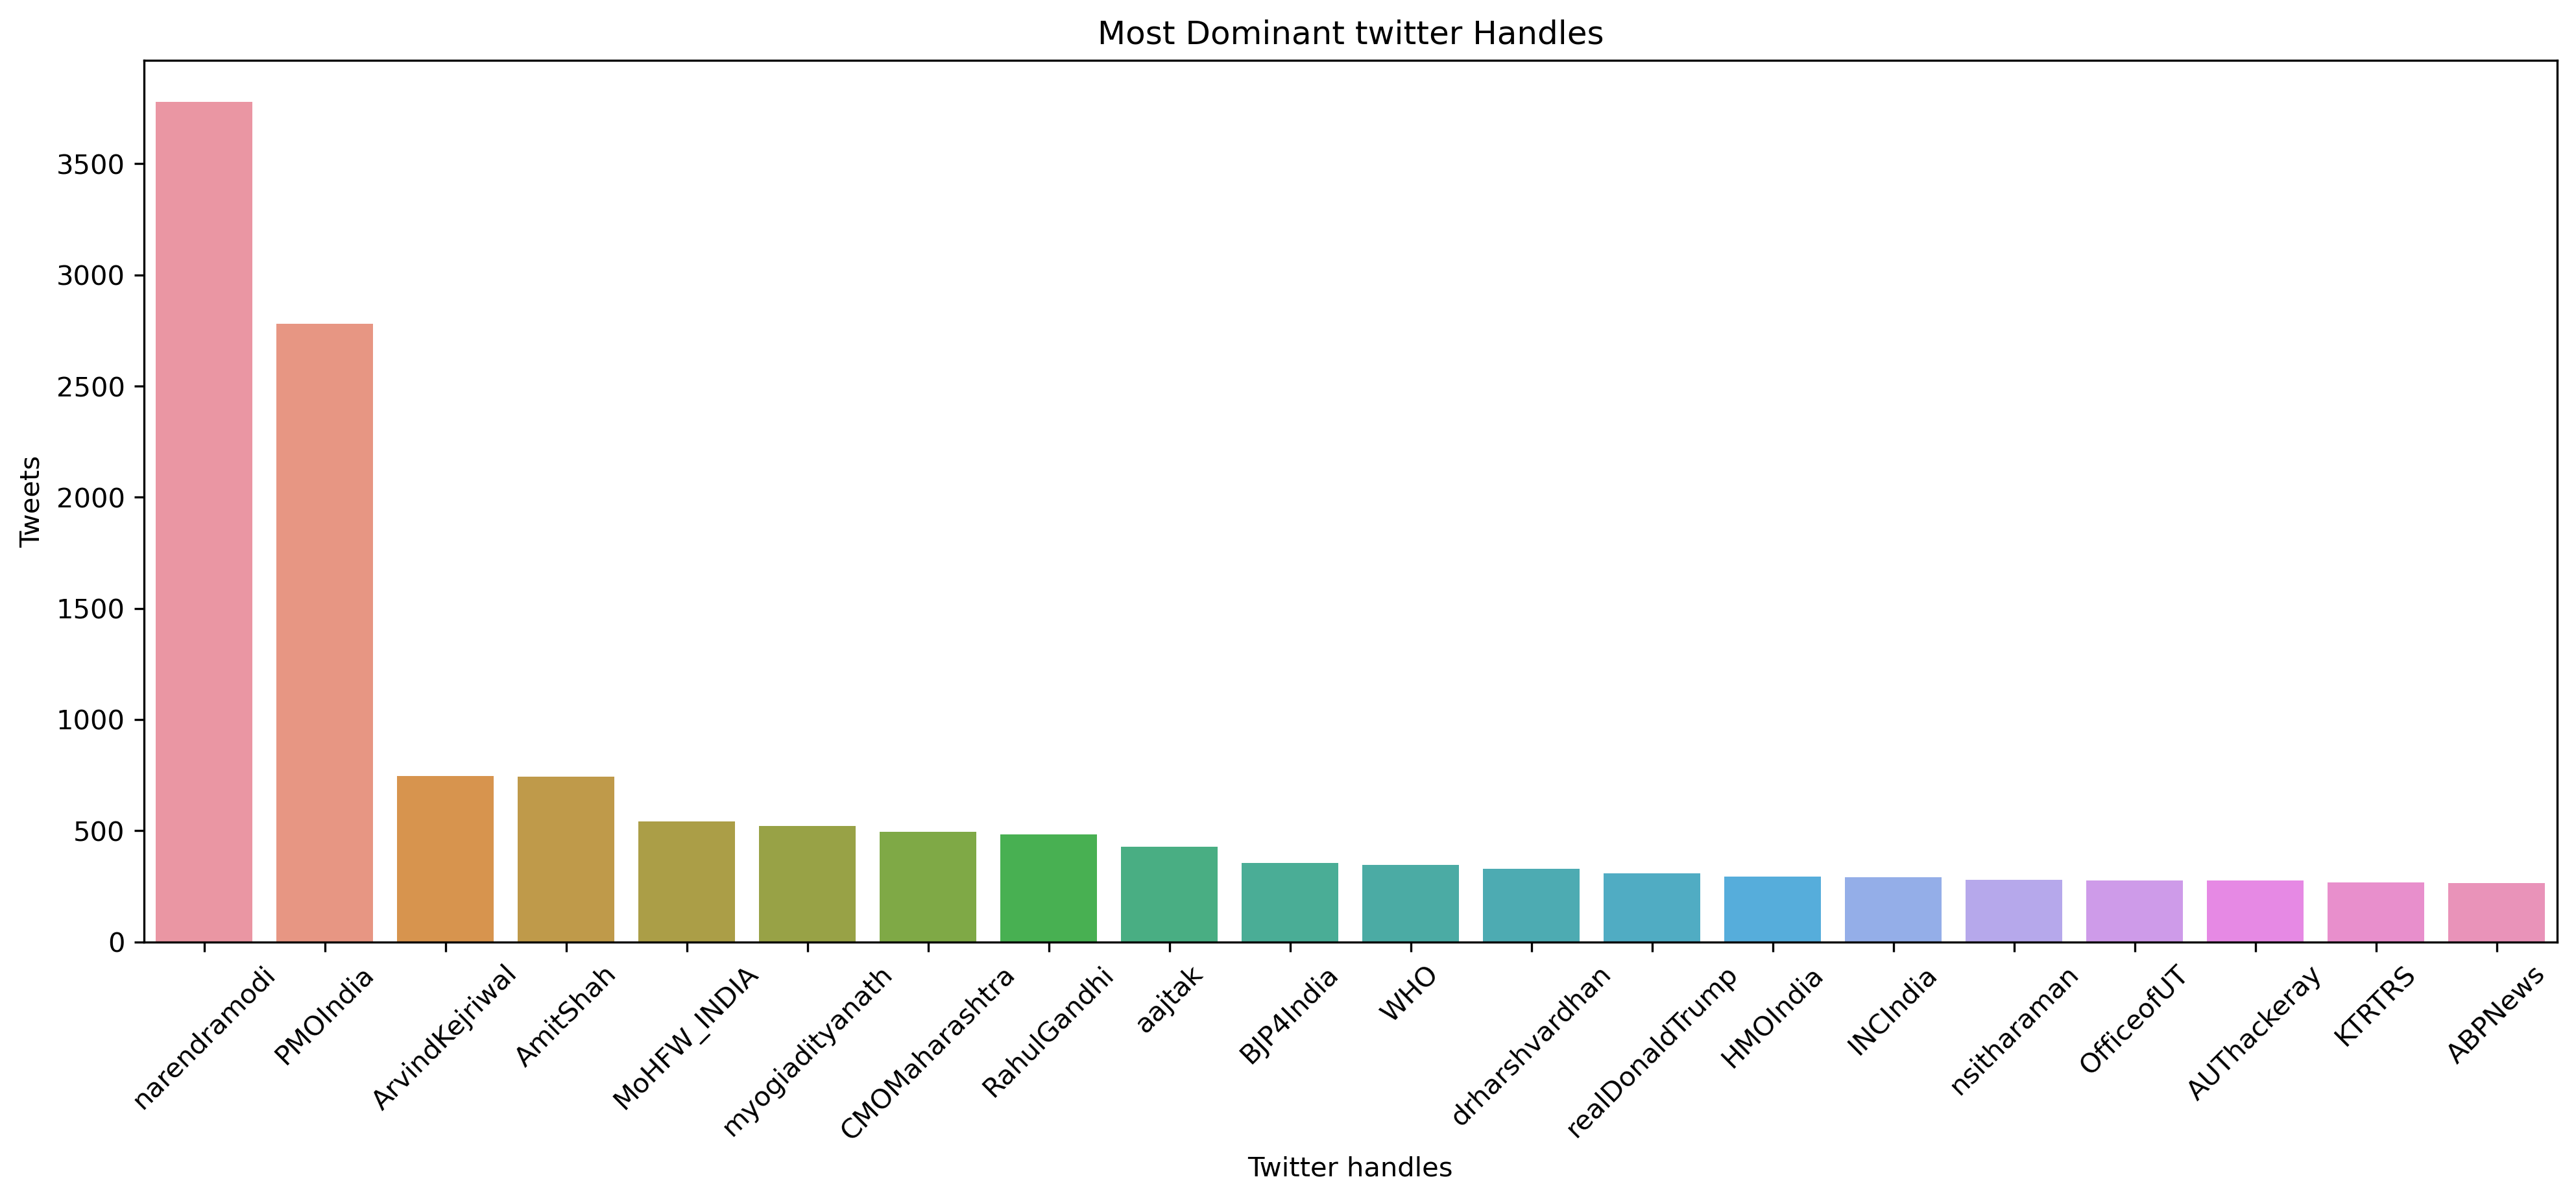

In [48]:
plt.figure(figsize=(16,6),dpi=300)

sns.barplot(x=users_df['Twitter handles'].head(20),y=users_df['Tweets'].head(20))
plt.xticks(rotation=(45))
plt.title('Most Dominant twitter Handles');

**_3.e)Creating a pie chart to show percent wise distribution of the popular users_**

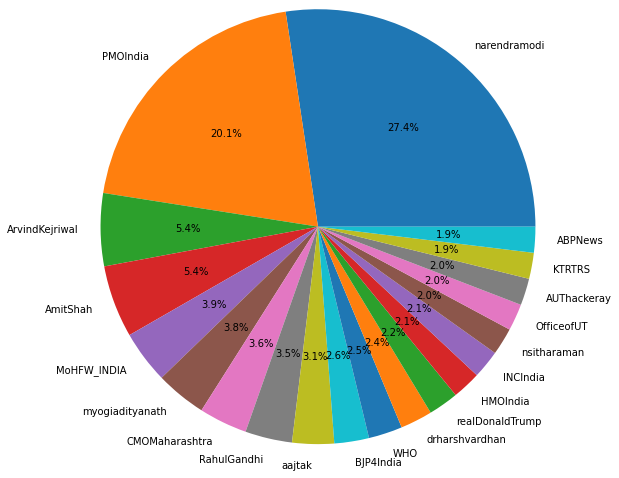

In [49]:
users_df.set_index('Twitter handles').head(20).plot.pie(y='Tweets',radius=2.5,autopct="%.1f%%",legend=None)
plt.ylabel("");

### 4.Most Retweeted Tweet

_It is by famous indian cricketer **Suresh Raina** who is tweeting about making donations to help fight the novel coronavirus_.

In [103]:
max(df['retweet_count'])

22549

In [102]:
df.iloc[df['retweet_count'].argmax()]['text']

'time bit help defeat covid19 pledging 52 lakh fight 31 lakh pm cares fund amp 21 lakh cm disaster relief fund please bit jai hind stayhomeindia'

In [51]:
df.iloc[df['retweet_count'].argmax()]['user_screen_name']

'ImRaina'

### 5. Monthly analysis
-------
Here we will analyze monthwise trend of tweets.

**_5.a)Creating 'dates' column by extracting dates from 'created_at' column of original dataframe._**

In [52]:
df['dates'] = pd.to_datetime(df['created_at'])

**_5.b)Extracting months from 'dates' column and dropping 'dates' column as it is now redundant_**

In [53]:
df['month'] = pd.DatetimeIndex(df['dates']).month

In [54]:
df.drop('dates',axis=1,inplace=True)

**_5.c)Checking how many different months' data we have_**

In [55]:
df['month'].unique()

array([3, 4, 5], dtype=int64)

**_5.d) Converting numeric value of months to actual names for better interpretation by <ins>.map()</ins> function._**

In [56]:
df['month']=df['month'].map({3:'March',4:'April',5:'May'})

In [57]:
df['month'].head()

0    March
1    March
2    March
3    March
4    March
Name: month, dtype: object

In [104]:
df['month'].value_counts()

March    16188
April    15505
May      12486
Name: month, dtype: int64

**_5.e) Visualizing the monthly trends with plots(countplot)._**

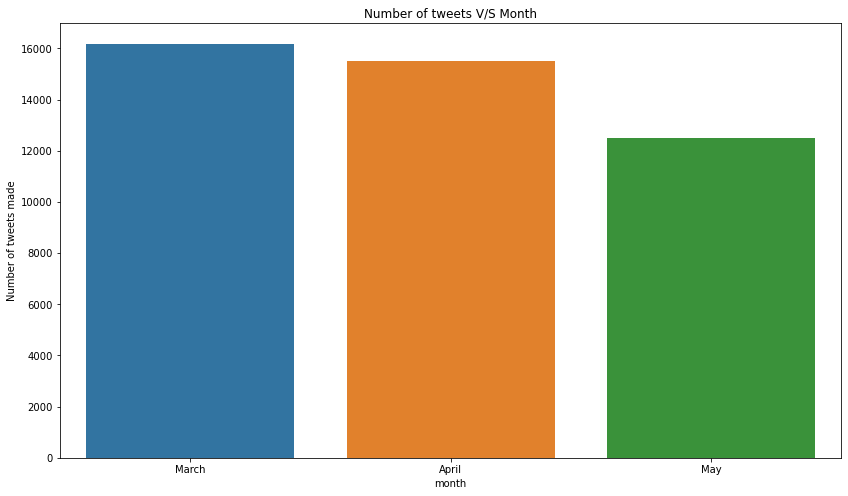

In [58]:
plt.figure(figsize=(14,8))
sns.countplot(df['month'])
plt.ylabel("Number of tweets made")
plt.title('Number of tweets V/S Month');

### 6.Exploring weekday based trend of tweets

In [59]:
df['created_at'].head()

0    Wed Mar 25 06:20:02 +0000 2020
1    Wed Mar 25 06:36:25 +0000 2020
2    Wed Mar 25 06:18:32 +0000 2020
3    Wed Mar 25 06:05:46 +0000 2020
4    Wed Mar 25 06:31:10 +0000 2020
Name: created_at, dtype: object

**_6.a) Extracting weekday number from the dates given in dataset._**

In [60]:
df['tweet_day'] = pd.to_datetime(df['created_at']).dt.weekday

In [61]:
tweet_day = df['tweet_day'].value_counts().sort_index()

**6.b)_This plot tells about week day based trend of tweets i.e how the number of tweets made changes with days_**

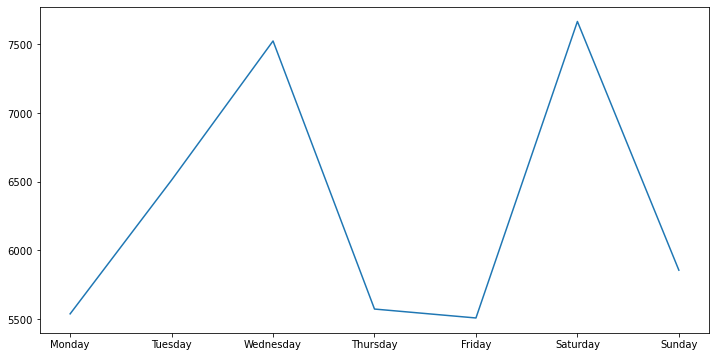

In [62]:
plt.figure(figsize=(12,6))
plt.xticks(tweet_day.index,labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['tweet_day'].value_counts().sort_index().plot();

### 7. SENTIMENT ANALYSIS

_First we will have to do some preprocessing to clean the tweets so that the sentiment analysis will yield more accurate results._

**_7.a) Method to clean the text of the tweets._**

In [63]:
def clean_Text(text ): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|\
                           (\w+:\/\/\S+)", " ", text).split())

**_7.b) Updating default nltk stopwords and then removing them from our tweets._**

In [64]:
stop_words = set(stopwords.words('english')) 
stop_words.add('Corona')
stop_words.add('COVID')
stop_words.add('COVID19')
stop_words.add('corona')
stop_words.add('india')
stop_words.add('coronavirus')
stop_words.add('Covid_19')
stop_words.add('twitter')
stop_words.add('Covid19')
stop_words.add('com')

In [65]:
def remove_stop(text ):
    words = word_tokenize(text.lower()) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

**_7.c) Method to compute sentiment score for tweet_**

In [66]:
def sentiment_analyzer(x ):
    return analyzer.polarity_scores(x)

**_7.d) Method to assign sentiment class based on compound score from VADER_**


In [67]:
def sentiment_Classification(x):
    if x['compound'] >= 0.05:
        return 'positive'
    elif  (x['compound'] > -0.05) and (x['compound'] < 0.05):
        return 'neutral'
    elif x['compound'] <= -0.05  :
        return 'negative'

**_7.e) Intialize VADER sentiment analyzer_**

In [68]:
analyzer = SentimentIntensityAnalyzer()

**_7.f) Clean text, remove stopwords, do sentiment analysis_**

In [69]:
df['text'] = df['text'].apply(clean_Text)
df['text'] = df['text'].apply(remove_stop)
df['sentiment'] = df['text'].apply(sentiment_analyzer)
df['sentiment_category'] = df['sentiment'].apply(sentiment_Classification)

NUMBER OF TWEETS OF EACH SENTIMENTS' CATEGORY

In [70]:
df['sentiment_category'].value_counts()

positive    22628
negative    12949
neutral      8602
Name: sentiment_category, dtype: int64

In [84]:
print("Percentage of positive tweets : " , int(22628/len(df)*100) , "%")
print("Percentage of negative tweets : " , int(12949/len(df)*100) , "%")
print("Percentage of neutral tweets : " , int(8602/len(df)*100) , "%")

Percentage of positive tweets :  51 %
Percentage of negative tweets :  29 %
Percentage of neutral tweets :  19 %


**_7.g) Visualizing the sentiments across tweets using a countplot._**

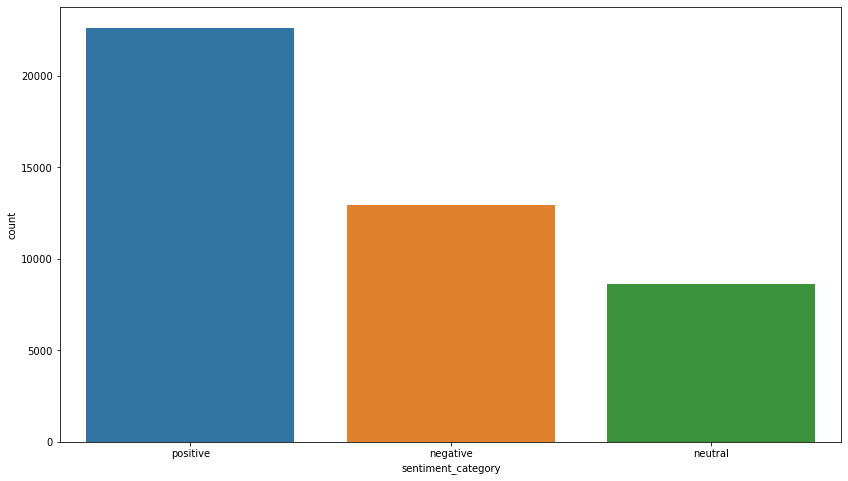

In [109]:
plt.figure(figsize=(14,8))
sns.countplot(df['sentiment_category']) ;

### 8. Analyzing how the sentiment of tweets changed as months passed

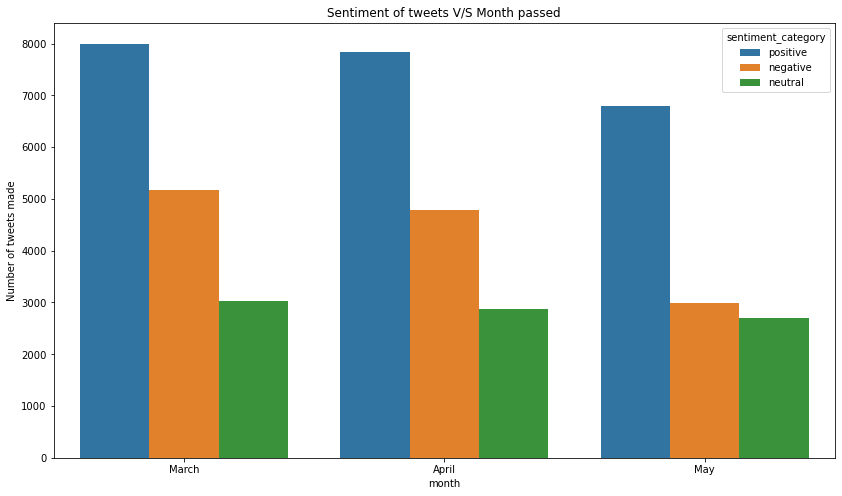

In [72]:
plt.figure(figsize=(14,8))
sns.countplot(x='month',data=df,hue='sentiment_category')
plt.ylabel("Number of tweets made")
plt.title('Sentiment of tweets V/S Month passed');

### 9. Analyzing how the sentiment of tweets changed with week days

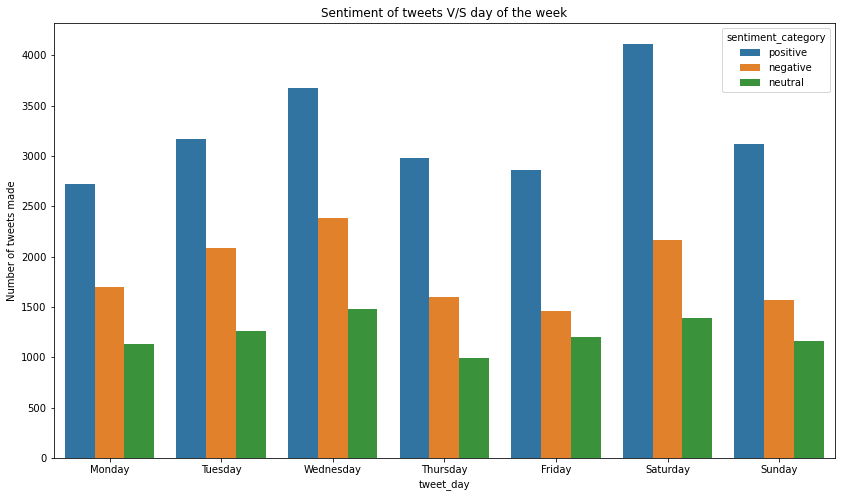

In [88]:
plt.figure(figsize=(14,8))
sns.countplot(x='tweet_day',data=df,hue='sentiment_category')
plt.ylabel("Number of tweets made")
plt.xticks(tweet_day.index,labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sentiment of tweets V/S day of the week');

### 10. GENERATING WORDCLOUDS FOR POSITIVE AND NEGATIVE TWEETS

In [73]:
positive_tweets = ''
negative_tweets = ''

**_9.a) Creating wordcloud for positive tweets_**

In [74]:
for index in df.index :
    if (df.iloc[index]['sentiment_category']=='positive'):
        positive_tweets = positive_tweets + ' ' + df.iloc[index]['text']

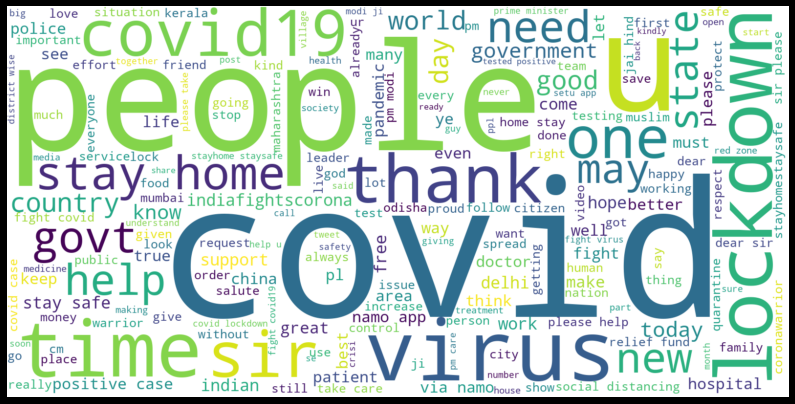

In [75]:
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co','t','d','n','viru','amp'])
wordcloud = WordCloud(background_color="white",width=1600, height=800,stopwords=stopwords).generate(positive_tweets)
plt.figure(figsize=(14,10),facecolor='k')
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show();

**_9.b) Creating wordcloud for negative tweets_**

In [76]:
for index in df.index :
    if (df.iloc[index]['sentiment_category']=='negative'):
        negative_tweets = negative_tweets + ' ' + df.iloc[index]['text']

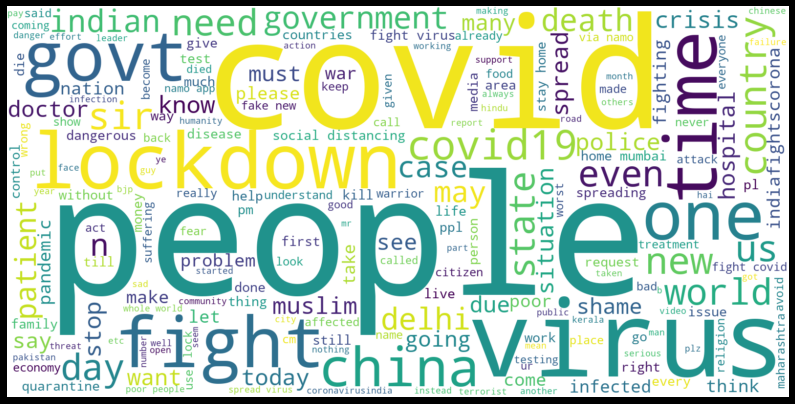

In [77]:
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co','t','d','u','viru','amp'])
wordcloud = WordCloud(background_color="white",width=1600, height=800,stopwords=stopwords).generate(negative_tweets)
plt.figure(figsize=(14,10),facecolor='k')
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show();

#                                       THANK YOU !!